In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import coint
from scipy.stats import pearsonr, zscore

In [181]:
df = pd.read_excel("Project 1 - Data.xlsx", sheet_name="Gov't bond yields", header = 1).dropna(how = "all", axis = 1)
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index("Unnamed: 0", inplace = True)
df.index.names = [None]
euro_df = df.iloc[:,:4]
euro_df["Average Yield"] =euro_df.mean(axis=1)
us_df = df.iloc[:,4:]

df_spread = pd.read_excel("Project 1 - Data.xlsx", sheet_name="Spreads, OAS, bp", header = 1).dropna(how = "all", axis = 1)
df_spread['Unnamed: 0'] = pd.to_datetime(df_spread['Unnamed: 0'])
df_spread.set_index("Unnamed: 0", inplace = True)
df_spread.index.names = [None]
df = euro_df.merge(df_spread, left_index=True, right_index=True).iloc[::-1]

maturities = {   
3: ['3Y German Bund', '1 - 3 Yrs'],
5: ['5Y German Bund','3 -5 Yrs'],
10:['10Y German Bund', '7 - 10 Yrs'], 
30:['30Y German Bund', '> 10  Yrs']
}
df[maturities[3]]

/var/folders/mc/sd8lk0kn4fz1q41w5qdn2fhc0000gn/T/ipykernel_88990/1053102579.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_df["Average Yield"] =euro_df.mean(axis=1)


,3Y German Bund,1 - 3 Yrs
2001-12-31,4.007870,120.634018
2002-01-31,4.180220,111.374517
2002-02-28,4.164660,135.439438
2002-03-29,4.579060,123.545474
2002-04-30,4.350810,126.076460
...,...,...
2014-09-30,-0.050027,56.739943
2014-10-31,-0.027688,57.620582
2014-11-28,-0.014525,52.242099
2014-12-31,-0.093041,48.510279


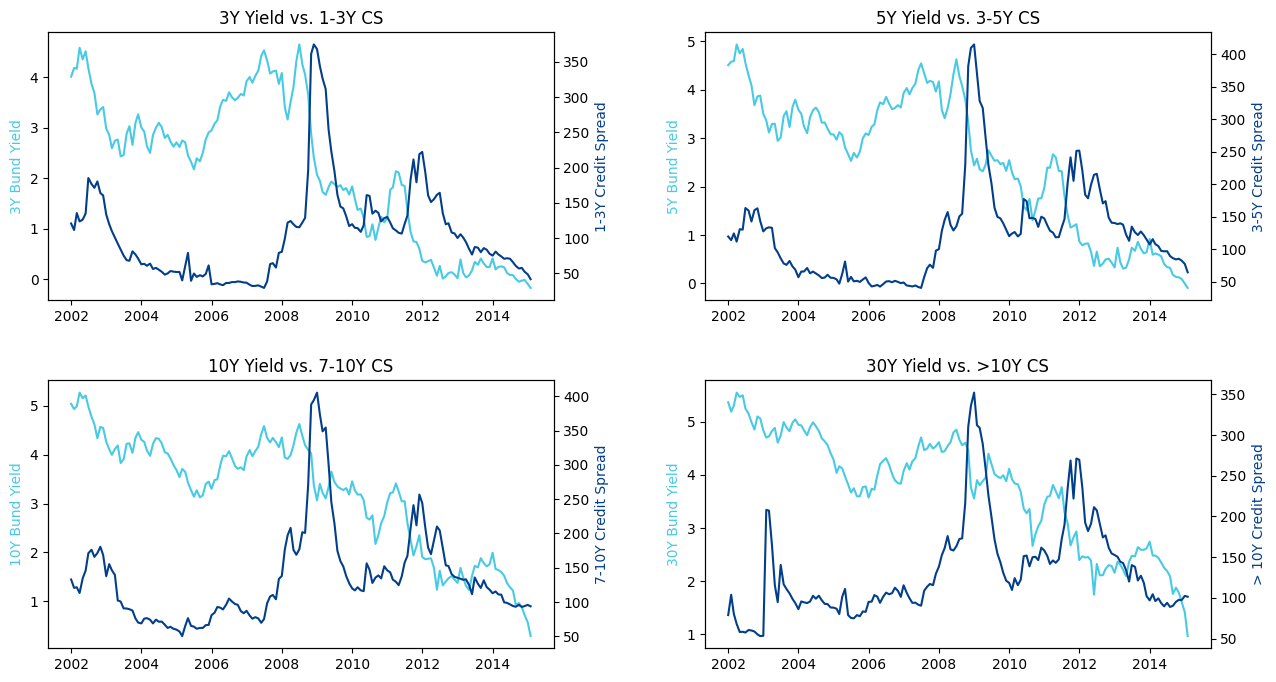

In [179]:
x = df.index
color_yield = '#48cae4'
color_spread = '#023e8a'
# Creamos la figura y los ejes para cada uno de los gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
(ax1, ax2), (ax3, ax4) = axs

################## GRAPH 1 #####################################
ax1.plot(x, df['3Y German Bund'], color = color_yield)
ax1.set_ylabel('3Y Bund Yield', color = color_yield)
ax1.set_title('3Y Yield vs. 1-3Y CS')


ax1b = ax1.twinx()
ax1b.plot(x, df['1 - 3 Yrs'], color = color_spread)
ax1b.set_ylabel('1-3Y Credit Spread', color=color_spread)
ax1b.tick_params(axis='y')

################## GRAPH 2 #####################################
ax2.plot(x, df['5Y German Bund'], color = color_yield)
ax2.set_ylabel('5Y Bund Yield', color = color_yield)
ax2.set_title('5Y Yield vs. 3-5Y CS')

ax2b = ax2.twinx()
ax2b.plot(x, df['3 -5 Yrs'], color = color_spread)
ax2b.set_ylabel('3-5Y Credit Spread', color=color_spread)
ax2b.tick_params(axis='y')

################## GRAPH 3 #####################################
ax3.plot(x, df['10Y German Bund'], color = color_yield)
ax3.set_ylabel('10Y Bund Yield', color = color_yield)
ax3.set_title('10Y Yield vs. 7-10Y CS')

ax3b = ax3.twinx()
ax3b.plot(x, df['7 - 10 Yrs'], color = color_spread)
ax3b.set_ylabel('7-10Y Credit Spread', color=color_spread)
ax3b.tick_params(axis='y')

################## GRAPH 4 #####################################
ax4.plot(x, df['30Y German Bund'], color = color_yield)
ax4.set_ylabel('30Y Bund Yield', color = color_yield)
ax4.set_title('30Y Yield vs. >10Y CS')

ax4b = ax4.twinx()
ax4b.plot(x, df['> 10  Yrs'], color = color_spread)
ax4b.set_ylabel('> 10Y Credit Spread', color = color_spread)
ax4b.tick_params(axis='y')

# Ajustamos los espacios entre los gráficos para que no se superpongan
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('Yield vs. CS comparison.png')
# Mostramos el plot
plt.show()

<AxesSubplot:>

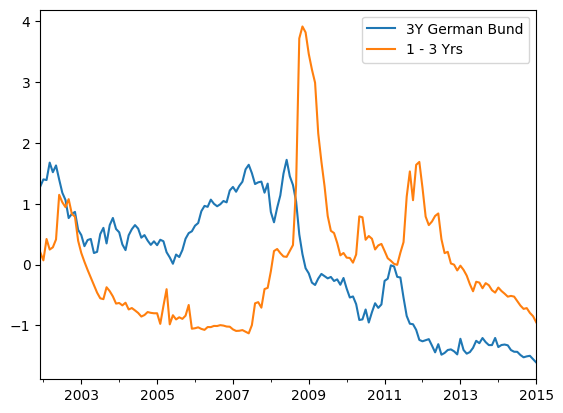

In [192]:
short_df = df[maturities[3]]
z_scores = short_df.apply(zscore)
z_scores.plot()

In [185]:
def lagged_correlations_computing(df, col1, col2, max_lags):
    correlations = {}
    # Calculate correlation for each lag and store it in the dictionary
    for lag in range(0, max_lags+1):
        serie_1= df[col1].shift(lag).dropna().tolist()
        #serie_1 = zscore(serie_1)
        serie_2 = df[col2].tolist()
        serie_2 = serie_2[lag:]
        #serie_1 = zscore(serie_2)
        correlations[lag] = pearsonr(serie_1,serie_2)[0]
    # Print dictionary of correlations for each lag
    return correlations

lagged_correlations_computing(df, maturities[3][0],  maturities[3][1], 40)

{0: -0.1706676965313964,
 1: -0.12114959023132582,
 2: -0.06332875143094567,
 3: -0.006204593531044818,
 4: 0.05141653414777246,
 5: 0.10032812182723307,
 6: 0.13174232043666018,
 7: 0.14255794807862812,
 8: 0.14391603302149253,
 9: 0.14197440298955122,
 10: 0.14231550979332686,
 11: 0.14051715720579658,
 12: 0.13850414023202365,
 13: 0.1397385956475045,
 14: 0.14759720583692765,
 15: 0.1578418975640335,
 16: 0.17221838004171658,
 17: 0.18645257420103906,
 18: 0.19354593423692681,
 19: 0.2020341280373226,
 20: 0.215936597056391,
 21: 0.22564101817404716,
 22: 0.22770795281649803,
 23: 0.22782319378974916,
 24: 0.2255855226574027,
 25: 0.21704860787585903,
 26: 0.20827545648960377,
 27: 0.2026162939866154,
 28: 0.19635701650072254,
 29: 0.19166946157639922,
 30: 0.18380492802591272,
 31: 0.17350158895127862,
 32: 0.16263707221710996,
 33: 0.15037197028709223,
 34: 0.1444410008462651,
 35: 0.14628217051267495,
 36: 0.1460597104943131,
 37: 0.1375040080349607,
 38: 0.1287110057235693,
 39